In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [2]:
#loading the dataset
original_data = pd.read_csv("bank-full.csv", sep=";")

### Understanding the data

In [3]:
#print the 5 first value
original_data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#print descriptive statistics
original_data.describe()
# We observe some extreme maximum values and high standard deviation values
# which will be further investigated

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
# print additional info about the type of data
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
#Check for NaN and None values
original_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
# Looking through the data points alternativelly marked as missing values
print('\nJobs: ', original_data.job.unique())
print('\nMarital status: ', original_data.marital.unique())
print('\nEducation: ', original_data.education.unique())
print('\nCredit in default: ', original_data.default.unique())
print('\nHousing loan: ', original_data.housing.unique())
print('\nPersonal loan: ', original_data.loan.unique())
print('\nContact channel: ', original_data.contact.unique())
print('\nMonth: ', original_data.month.unique())
print('\nPrevious campaign outcome: ', original_data.poutcome.unique())
print('\nDefault: ', original_data.default.unique())


Jobs:  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Marital status:  ['married' 'single' 'divorced']

Education:  ['tertiary' 'secondary' 'unknown' 'primary']

Credit in default:  ['no' 'yes']

Housing loan:  ['yes' 'no']

Personal loan:  ['no' 'yes']

Contact channel:  ['unknown' 'cellular' 'telephone']

Month:  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Previous campaign outcome:  ['unknown' 'failure' 'other' 'success']

Default:  ['no' 'yes']


In [8]:
# Potential missing values
print('\nUnknown values in job: ', (original_data.job == 'unknown').sum())
print('\nUnknown values in education: ', (original_data.education == 'unknown').sum())
print('\nUnknown values in contact: ', (original_data.contact == 'unknown').sum())
print('\nUnknown values in poutcome: ', (original_data.poutcome == 'unknown').sum())


Unknown values in job:  288

Unknown values in education:  1857

Unknown values in contact:  13020

Unknown values in poutcome:  36959


In [9]:
original_data['poutcome'].value_counts()
print(36959/len(original_data.poutcome))

#81 % of the data is unknown. We may delete this column

0.8174780473778506


In [10]:
# Dealing with missing values
original_data = original_data.drop(['poutcome'], axis=1)
original_data = original_data[original_data.job != 'unknown']
print('\nUnknown values in job: ', (original_data.job == 'unknown').sum())


Unknown values in job:  0


In [11]:
# Ensuring there no unnatural values
if(original_data.age.any() < 0 or original_data.age.any() > 100):
    print('\nLikely Impossible!')
else:
    print('\nGood data!')
if(original_data.day.any() < 1 or original_data.age.any() > 31):
    print('\nLikely Impossible!')
else:
    print('\nGood data!')
if(original_data.duration.any() <= 0):
    print('\nLikely Impossible!')
else:
    print('\nGood data!')
if(original_data.campaign.any() <= 0):
    print('\nLikely Impossible!')
else:
    print('\nGood data!')
if(original_data.previous.any() <= 0):
    print('\nLikely Impossible!')
else:
    print('\nGood data!')
if(original_data.pdays.any() < 0 and original_data.pdays.any() != -1):
    print('\nLikely Impossible!')
else:
    print('\nGood data!')


Good data!

Good data!

Good data!

Good data!

Good data!

Good data!


### Visualisation

Text(0.5, 1.0, 'Marital status')

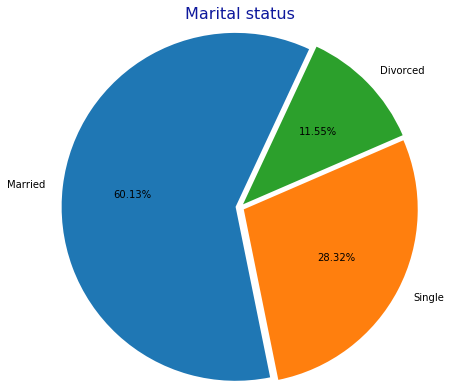

In [12]:
pie_array = np.zeros(3, dtype = int)
pie_array[0] = sum(original_data.marital == 'married')
pie_array[1] = sum(original_data.marital == 'single')
pie_array[2] = sum(original_data.marital == 'divorced')
#print(pie_array[::])
plt.pie(pie_array, radius = 2, startangle = 65.0, labels = ['Married', 'Single', 'Divorced'], explode = [0.05, 0.05, 0.05], autopct='%1.2f%%')
plt.axis = 'equal'
plt.title('Marital status', pad = 80.0, color = '#0E189C', fontdict = {'fontsize':16})

Text(0.5, 1.0, 'Levels of education')

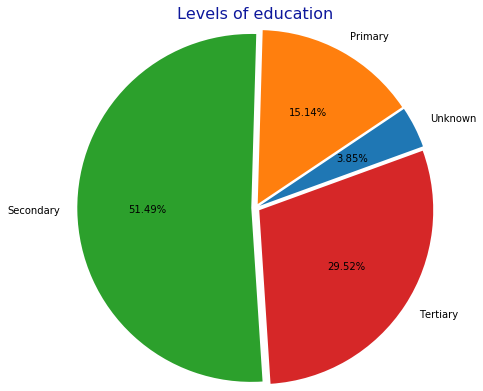

In [13]:
pie_array = np.zeros(4, dtype = int)
pie_array[0] = sum(original_data.education == 'unknown')
pie_array[1] = sum(original_data.education == 'primary')
pie_array[2] = sum(original_data.education == 'secondary')
pie_array[3] = sum(original_data.education == 'tertiary')
#print(pie_array[::])
plt.pie(pie_array, radius = 2, startangle = 20.0, labels = ['Unknown', 'Primary', 'Secondary', 'Tertiary'], explode = [0.05, 0.05, 0.05, 0.05], autopct='%1.2f%%')
plt.axis = 'equal'
plt.title('Levels of education', pad = 80.0, color = '#0E189C', fontdict = {'fontsize':16})

[12909 29154  2860]


Text(0.5, 1.0, 'Contact method')

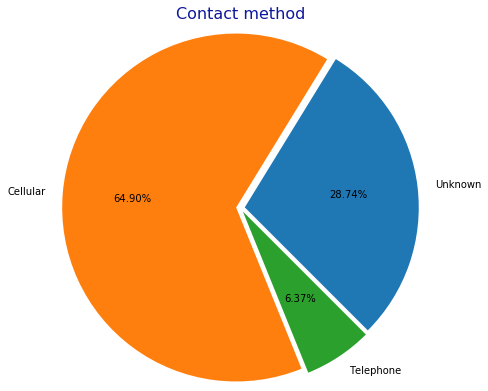

In [14]:
pie_array = np.zeros(3, dtype = int)
pie_array[0] = sum(original_data.contact == 'unknown')
pie_array[1] = sum(original_data.contact == 'cellular')
pie_array[2] = sum(original_data.contact == 'telephone')
print(pie_array[::])
plt.pie(pie_array, radius = 2, startangle = -45.0, labels = ['Unknown', 'Cellular', 'Telephone'], explode = [0.05, 0.05, 0.05], autopct='%1.2f%%')
plt.axis = 'equal'
plt.title('Contact method', pad = 80.0, color = '#0E189C', fontdict = {'fontsize':16})

In [15]:
# Discarding the 'contact' feature
original_data = original_data.drop(['contact'], axis=1)

Text(0.5, 1.0, 'Overview of balance related to occupation')

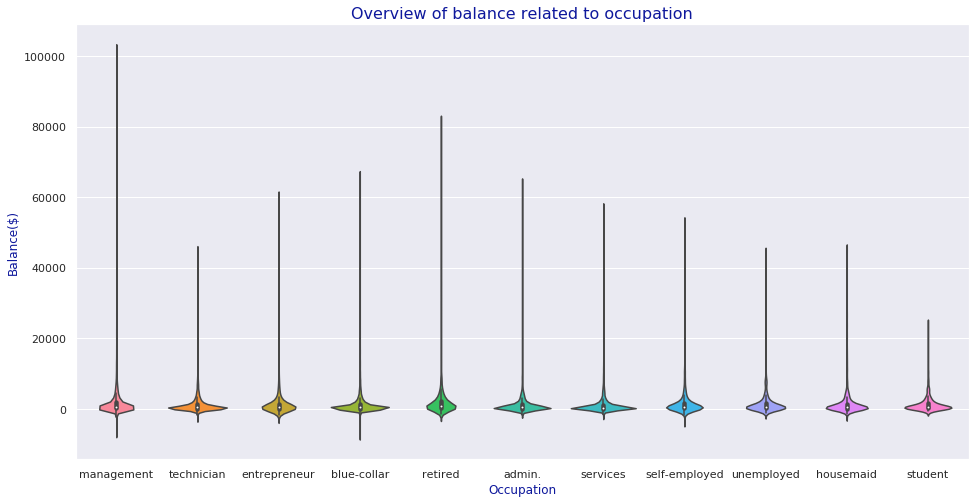

In [16]:
sns.set()
plt.figure(figsize = [16,8])
ax = sns.violinplot(y=original_data.balance, x=original_data.job, saturation = 1)
ax.set_ylabel('Balance($)', color= '#0E189C')
ax.set_xlabel('Occupation', color = '#0E189C')
ax.set_title('Overview of balance related to occupation', color = '#0E189C', fontdict = {'fontsize':16})

Text(0.5, 1.0, 'Overview of balance related to education')

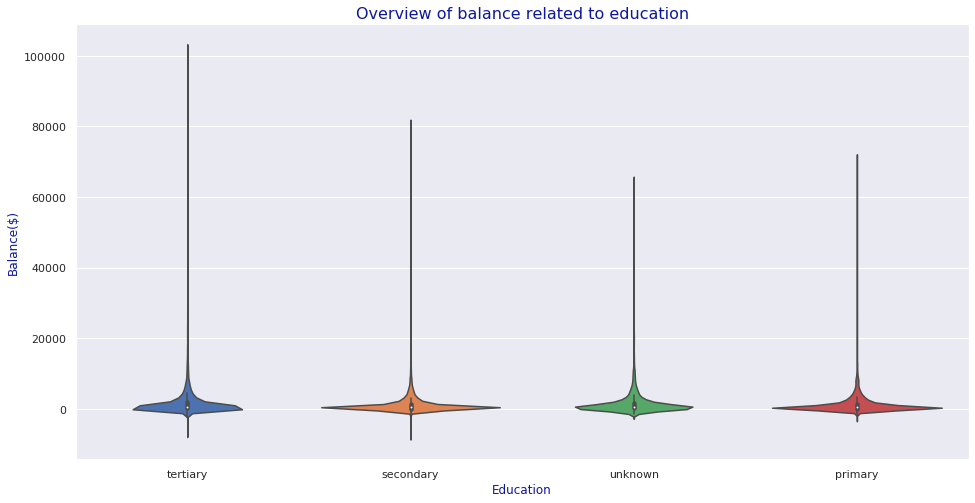

In [17]:
sns.set()
plt.figure(figsize = [16,8])
ax = sns.violinplot(y=original_data.balance, x=original_data.education, saturation = 1)
ax.set_ylabel('Balance($)', color= '#0E189C')
ax.set_xlabel('Education', color = '#0E189C')
ax.set_title('Overview of balance related to education', color = '#0E189C', fontdict = {'fontsize':16})

Text(0.5, 1.0, 'Overview of contact duration related to campaign outcome')

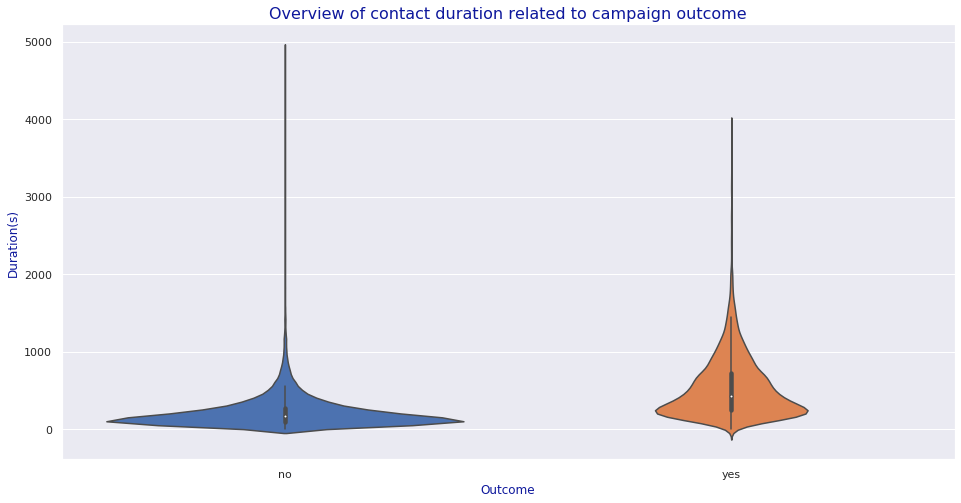

In [18]:
sns.set()
plt.figure(figsize = [16,8])
ax = sns.violinplot(y=original_data.duration, x=original_data.y, saturation = 1)
ax.set_ylabel('Duration(s)', color= '#0E189C')
ax.set_xlabel('Outcome', color = '#0E189C')
ax.set_title('Overview of contact duration related to campaign outcome', color = '#0E189C', fontdict = {'fontsize':16})

Text(0.5, 0, 'Default credit')

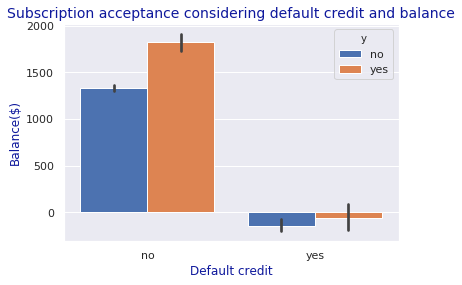

In [19]:
sns.set_style()
ax = sns.barplot(y = original_data.balance, x = original_data.default, hue = original_data.y, saturation = 1)
ax.set_title('Subscription acceptance considering default credit and balance', color = '#0E189C', fontdict = {'fontsize':14})
ax.set_ylabel('Balance($)', color= '#0E189C')
ax.set_xlabel('Default credit', color = '#0E189C')

Text(0.5, 0, 'Housing loan')

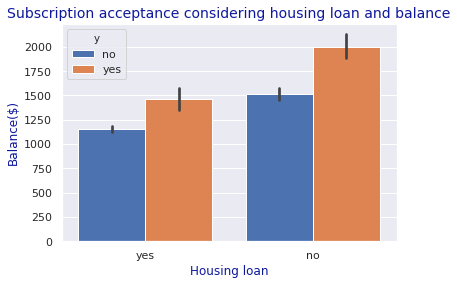

In [20]:
sns.set()
ax = sns.barplot(x = original_data.housing, y = original_data.balance, hue = original_data.y, saturation = 1)
ax.set_title('Subscription acceptance considering housing loan and balance', color = '#0E189C', fontdict = {'fontsize':14})
ax.set_ylabel('Balance($)', color= '#0E189C')
ax.set_xlabel('Housing loan', color = '#0E189C')

Text(0.5, 0, 'Personal loan')

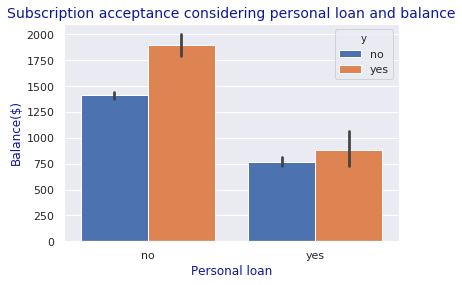

In [21]:
sns.set()
ax = sns.barplot(x = original_data.loan, y = original_data.balance, hue = original_data.y, saturation = 1)
ax.set_title('Subscription acceptance considering personal loan and balance', color = '#0E189C', fontdict = {'fontsize':14})
ax.set_ylabel('Balance($)', color= '#0E189C')
ax.set_xlabel('Personal loan', color = '#0E189C')

Text(0.5, 0, 'Age')

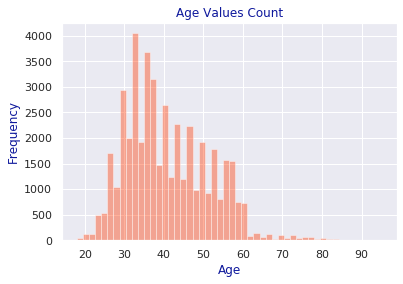

In [22]:
# Count plot of 'age' feature to observe distribution
sns.set(style = 'darkgrid')
ax = sns.distplot(original_data.age, kde = False, color = '#FF3A03')
ax.set_title('Age Values Count', color = '#0E189C')
ax.set_ylabel('Frequency', color= '#0E189C')
ax.set_xlabel('Age', color = '#0E189C')

7142


Text(0.5, 0, 'Balance($)')

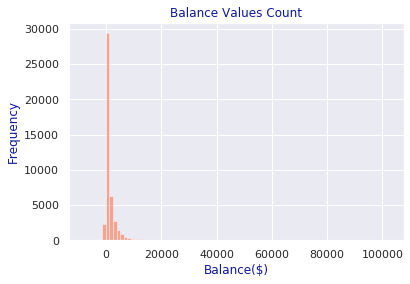

In [23]:
# Count plot of 'balance' feature
# Find how many data points are, to know how many bins to create
balance_array = original_data.balance.unique()
print(len(balance_array))
# Plot histogram
sns.set()
ax1 = sns.distplot(original_data.balance, bins = 84, kde = False, color = '#FF3A03')
ax1.set_title('Balance Values Count', color = '#0E189C')
ax1.set_ylabel('Frequency', color = '#0E189C')
ax1.set_xlabel('Balance($)', color = '#0E189C')

Text(0.5, 0, 'Balance($)')

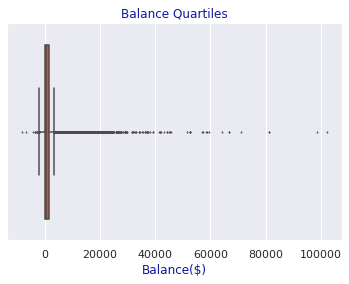

In [24]:
# Whisker plot to point the outliers
sns.set()
ax = sns.boxplot(original_data.balance, color = '#FF3A03', fliersize = 1)
ax.set_title('Balance Quartiles', color = '#0E189C')
ax.set_xlabel('Balance($)', color = '#0E189C')

Text(0.5, 0, 'Balance($)')

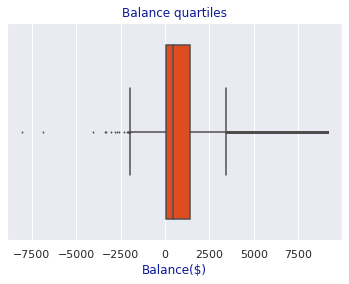

In [25]:
# Capping Outliers in balance with 3x standard deviation
original_data.balance = original_data.balance.where(original_data.balance < 9100, other = 9100)
original_data.balance = original_data.balance.where(original_data.balance > -9100, other = -9100)
sns.set()
ax = sns.boxplot(original_data.balance, color = '#FF3A03', fliersize = 1)
ax.set_title('Balance quartiles', color = '#0E189C')
ax.set_xlabel('Balance($)', color = '#0E189C')

1571


Text(0.5, 0, 'Duration(s)')

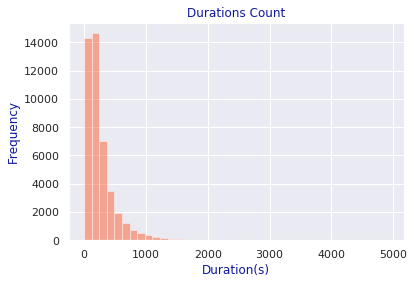

In [26]:
# Count plot of 'duration' feature
# Find how many data points are, to know how many bins to create
duration_array = original_data.duration.unique()
print(len(duration_array))
# Plot histogram
sns.set()
ax = sns.distplot(original_data.duration, bins = 40, kde = False, color = '#FF3A03')
ax.set_title('Durations Count', color = '#0E189C')
ax.set_ylabel('Frequency', color= '#0E189C')
ax.set_xlabel('Duration(s)', color = '#0E189C')

Text(0.5, 0, 'Duration(s)')

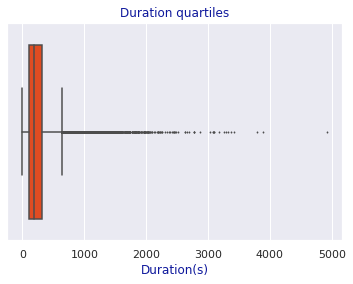

In [27]:
# Whisker plot to point the outliers
sns.set()
ax = sns.boxplot(original_data.duration, color = '#FF3A03', fliersize = 1)
ax.set_title('Duration quartiles', color = '#0E189C')
ax.set_xlabel('Duration(s)', color = '#0E189C')

Text(0.5, 0, 'Duration(s)')

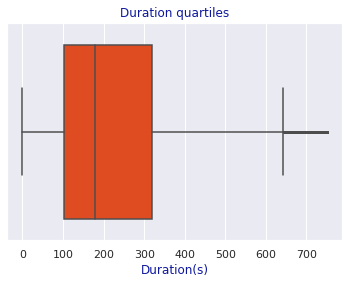

In [28]:
# Capping Outliers in duration with 3x standard deviation
original_data.duration = original_data.duration.where(original_data.duration < 750, other = 750)
sns.set()
ax = sns.boxplot(original_data.duration, color = '#FF3A03', fliersize = 1)
ax.set_title('Duration quartiles', color = '#0E189C')
ax.set_xlabel('Duration(s)', color = '#0E189C')

Text(0.5, 0, 'Nr of contacts')

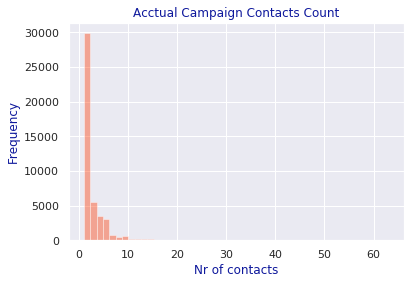

In [29]:
# Count plot of 'campaign' feature
sns.set()
ax = sns.distplot(original_data.campaign, bins = 48, kde = False, color = '#FF3A03')
ax.set_title('Acctual Campaign Contacts Count', color = '#0E189C')
ax.set_ylabel('Frequency', color= '#0E189C')
ax.set_xlabel('Nr of contacts', color = '#0E189C')

Text(0.5, 0, 'campaign')

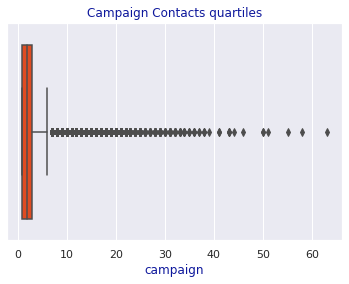

In [30]:
# Whisker plot to point the outliers
sns.set()
ax = sns.boxplot(original_data.campaign, color = '#FF3A03')
ax.set_title('Campaign Contacts quartiles', color = '#0E189C')
ax.set_xlabel('campaign', color = '#0E189C')

Text(0.5, 0, 'campaign')

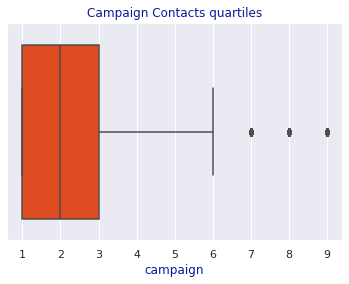

In [31]:
# Capping Outliers in duration with 3x standard deviation
original_data.campaign = original_data.campaign.where(original_data.campaign < 9, other = 9)
sns.set()
ax = sns.boxplot(original_data.campaign, color = '#FF3A03')
ax.set_title('Campaign Contacts quartiles', color = '#0E189C')
ax.set_xlabel('campaign', color = '#0E189C')

In [32]:
#Data transformation. From categorical to numerical value

le = preprocessing.LabelEncoder()
le.fit(original_data['job'])
original_data['job'] = (le.transform(original_data['job']))
x = [x for x in range(len(set(original_data['job'])))]
print(x,le.inverse_transform(x) )

le.fit(original_data['marital'])
original_data['marital'] = (le.transform(original_data['marital']))

le.fit(original_data['education'])
original_data['education'] = (le.transform(original_data['education']))

le.fit(original_data['default'])
original_data['default'] = (le.transform(original_data['default']))

le.fit(original_data['housing'])
original_data['housing'] = (le.transform(original_data['housing']))

le.fit(original_data['loan'])
original_data['loan'] = (le.transform(original_data['loan']))


le.fit(original_data['month'])
original_data['month'] = (le.transform(original_data['month']))


le.fit(original_data['y'])
original_data['y'] = (le.transform(original_data['y']))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed']


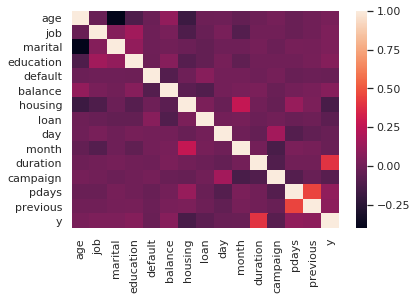

In [33]:
# Liniar correlation between all variables
corr =original_data.corr(method = 'pearson')
sns.heatmap(corr)

In [34]:
#The repartition of the classes for the target variable
print(original_data.y.value_counts())

0    39668
1     5255
Name: y, dtype: int64


In [35]:
print("proportion of classes:\n", original_data.y.value_counts()/len(original_data.y))

proportion of classes:
 0    0.883022
1    0.116978
Name: y, dtype: float64


### Preparing the data set and dividing into training and test

The first dataset will have the original proportion of classes

The second dataset will be balanced in terms of the output variable

In [36]:
# Spliting between output and input variables
x = original_data.iloc[:,:-1]
y = original_data.iloc[:,-1]

In [37]:
# This one will have the same proportion as the original dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [38]:
C1= original_data[original_data['y']==1]
C0 = original_data[original_data['y']==0].sample(n=len(C1), random_state=0)
data_balanced = pd.concat([C0, C1])
x1 = data_balanced.iloc[:,:-1]
y1 = data_balanced.iloc[:,-1]

In [39]:
#This one will be balanced
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.33)
data_balanced.describe()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
count,10510.000000,10510.000000,10510.000000,10510.000000,10510.000000,10510.000000,10510.000000,10510.000000,10510.000000,10510.000000,10510.000000,10510.000000,10510.000000,10510.000000,10510.000000
mean,41.189534,4.411418,1.205138,1.277069,0.014462,1408.121598,0.481256,0.132445,15.573644,5.418554,335.806280,2.347383,52.271836,0.822360,0.500000
std,12.002341,3.205539,0.625353,0.745793,0.119393,2104.345291,0.499672,0.338990,8.365306,3.203175,233.408044,1.861937,109.188569,2.209103,0.500024
min,18.000000,0.000000,0.000000,0.000000,0.000000,-4057.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,125.000000,0.000000,0.000000,8.000000,3.000000,145.000000,1.000000,-1.000000,0.000000,0.000000
50%,38.000000,4.000000,1.000000,1.000000,0.000000,556.500000,0.000000,0.000000,15.000000,6.000000,263.000000,2.000000,-1.000000,0.000000,0.500000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1767.000000,1.000000,0.000000,21.000000,8.000000,511.000000,3.000000,56.750000,1.000000,1.000000
max,95.000000,10.000000,2.000000,3.000000,1.000000,9100.000000,1.000000,1.000000,31.000000,11.000000,750.000000,9.000000,854.000000,58.000000,1.000000


In [40]:
# Standardizing the data for both datasets
X_train = preprocessing.StandardScaler().fit_transform(X_train)
X_test = preprocessing.StandardScaler().fit_transform(X_test)

X_train1 = preprocessing.StandardScaler().fit_transform(X_train1)
X_test1 = preprocessing.StandardScaler().fit_transform(X_test1)

In [41]:
# There is enough data to keep all the features 
# however a pca algorithm will be implemented

In [42]:
pca = PCA(.95)
pca.fit(X_train1)
X_train1_new = pca.transform(X_train1)
X_test1_new = pca.transform(X_test1)
pca.explained_variance_ratio_
# it is shown with the explained variance ratio matrix that there is no  
# principal component and all the features seem essential

array([0.11491022, 0.10989478, 0.10494093, 0.08132291, 0.07663544,
       0.07143438, 0.07095874, 0.06465802, 0.06256893, 0.06191064,
       0.05791317, 0.05264995, 0.03532469])

### Classification

In [43]:
### Function to plot the ROC curve

def ROC(test, prediction):
    
    n = len(prediction)
    

    TP = []
    TN = []
    FP = []
    FN = []

    #initialize

    if ((prediction[0]==0) and (test.iloc[0]==0)):
        TP.append(1)
        TN.append(0)
        FP.append(0)
        FN.append(0)
    if ((prediction[0]==0) and (test.iloc[0]==1)):
        TP.append(0)
        TN.append(0)
        FP.append(0)
        FN.append(1)
    if ((prediction[0]==1) and (test.iloc[0]==0)):
        TP.append(0)
        TN.append(0)
        FP.append(1)
        FN.append(0)
    if ((prediction[0]==1) and (test.iloc[0]==1)):
        TP.append(0)
        TN.append(1)
        FP.append(0)
        FN.append(0)

    for k in range(1,n-1):
        
        if ((prediction[k]==0) and (test.iloc[k]==0)):
            TP.append((TP[k-1]+1))
            TN.append(TN[k-1]+0)
            FP.append(FP[k-1]+0)
            FN.append(FN[k-1]+0)

        if ((prediction[k]==0) and (test.iloc[k]==1)):
            TP.append((TP[k-1]+0))
            TN.append(TN[k-1]+0)
            FP.append(FP[k-1]+0)
            FN.append(FN[k-1]+1)
        if ((prediction[k]==1) and (test.iloc[k]==0)):
            TP.append((TP[k-1]+0))
            TN.append(TN[k-1]+0)
            FP.append(FP[k-1]+1)
            FN.append(FN[k-1]+0)
        if ((prediction[k]==1) and (test.iloc[k]==1)):
            TP.append((TP[k-1]+0))
            TN.append(TN[k-1]+1)
            FP.append(FP[k-1]+0)
            FN.append(FN[k-1]+0)



    
   
    
    if (TP[-1]==0):
        TP[0]=0
        TP[-1]=1
    if FP[-1]==0:
        FP[0]=0
        FP[-1]=1
        
    for k in range(len(TP)):
        TP[k]=TP[k]/TP[-1]
        FP[k]=FP[k]/FP[-1]
    

    
    plt.figure()
    plt.title('ROC curve')
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.plot(FP,TP)
    
    return None

In [44]:
def F1score(y_test,y_pred):
    
    confusion_ma = confusion_matrix(y_test, y_pred)

    TP = confusion_ma[1, 1]
    TN = confusion_ma[0, 0]
    FP = confusion_ma[0, 1]
    FN = confusion_ma[1, 0]
    
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    
    F1 = 2*precision*recall/(precision+recall)
    return(F1)

### First algorithm of KNeighbors with the unbalanced data

In [45]:
### Kneighboor classifier

#We can try to find the optimal number of neighbors because its is not very complex to compute and calculate

for k in range(1,5):
        
    neigh = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='auto', p=2)
    neigh.fit(X_train, y_train)

    y_pred = neigh.predict(X_test)

    print("Accuracy with ",k, "neighbors " ,metrics.accuracy_score(y_test, y_pred))

### there is no need to change the value of k

neigh = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', p=2)
neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

confusion_matrix(y_test,y_pred)


Accuracy with  1 neighbors  0.8631365935919055
Accuracy with  2 neighbors  0.882495784148398
Accuracy with  3 neighbors  0.8793254637436763
Accuracy with  4 neighbors  0.883035413153457
Accuracy: 0.881079258010118


array([[12583,   460],
       [ 1303,   479]])

F1score =  0.35207644248438075


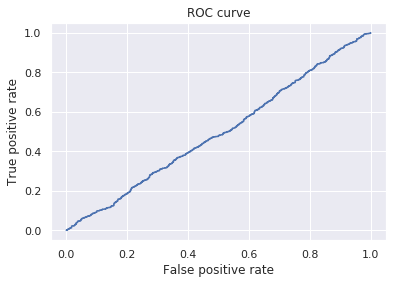

In [46]:
#We can plot the roc curve for k=5
ROC(y_test, y_pred)
print("F1score = ",F1score(y_test,y_pred))

In [47]:
#if we look at the confusion matrix, the model makes too many mistakes

### Kneigbors algorithm with the balance dataset

In [48]:
### Kneighboor classifier
neigh = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', p=2)
neigh.fit(X_train1, y_train1)

y_pred1 = neigh.predict(X_test1)

print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

confusion_matrix(y_test1,y_pred1)


Accuracy: 0.7679446526376478


array([[1360,  392],
       [ 413, 1304]])

F1score =  0.7641371227658951


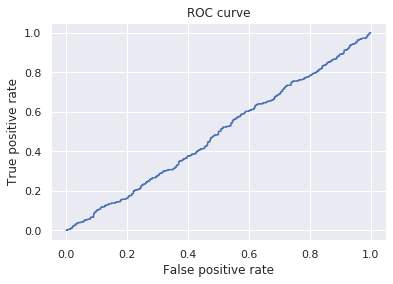

In [49]:
#We can plot the roc curve for k=5
ROC(y_test1, y_pred1)
print("F1score = ",F1score(y_test1,y_pred1))

In [50]:
# The model is less accurate but it makes less mistakes

### Decision tree classifier for unbalanced data

In [51]:
clf = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_split=20)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy :",metrics.accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)


Accuracy : 0.8814165261382799


array([[12401,   642],
       [ 1116,   666]])

F1score =  0.4310679611650486


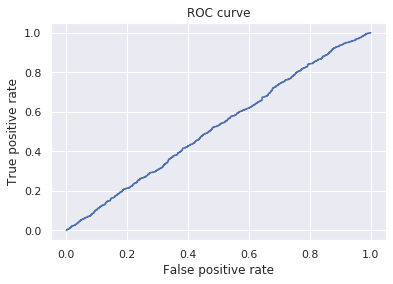

In [52]:
ROC(y_test, y_pred)
print("F1score = ",F1score(y_test,y_pred))

### ### Decision tree classifier for balanced data

In [53]:
clf = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_split=20)
clf.fit(X_train1,y_train1)
y_predict1 = clf.predict(X_test1)
print("Accuracy :",metrics.accuracy_score(y_test1, y_predict1))
confusion_matrix(y_test1, y_predict1)

Accuracy : 0.7630441049293745


array([[1389,  363],
       [ 459, 1258]])

F1score =  0.7537447573397243


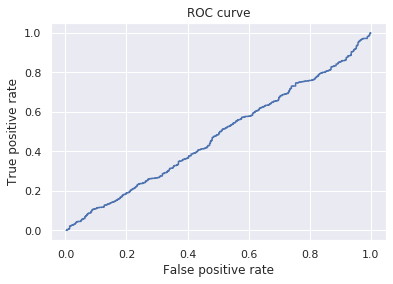

In [54]:
ROC(y_test1,y_predict1)
print("F1score = ",F1score(y_test1,y_predict1))

### Random forest with unbalanced data

In [55]:
clf = RandomForestClassifier(max_depth=30, random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy :",metrics.accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy : 0.8913322091062394


array([[12676,   367],
       [ 1244,   538]])

F1score =  0.40044659471529587


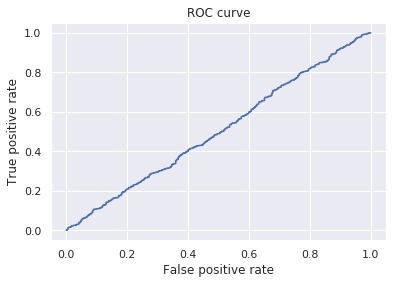

In [56]:
ROC(y_test, y_pred)
print("F1score = ",F1score(y_test,y_pred))

### Random forest with balanced data

In [57]:
clf = RandomForestClassifier(max_depth=30, random_state=0)
clf.fit(X_train1,y_train1)
y_predict1=clf.predict(X_test1)
print("Accuracy ",k, " :",metrics.accuracy_score(y_test1, y_predict1))
confusion_matrix(y_test1, y_predict1)

Accuracy  4  : 0.8108965119631018


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[1421,  331],
       [ 325, 1392]])

F1score =  0.8093023255813954


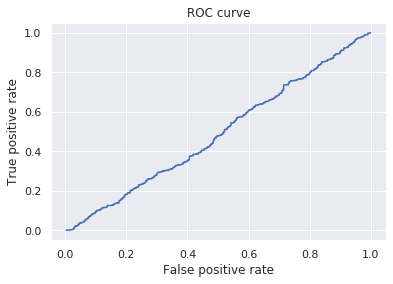

In [58]:
ROC(y_test1,y_predict1)
print("F1score = ",F1score(y_test1,y_predict1))

### Bayes classifier

In [59]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8564586846543002


F1score =  0.4361420243773185


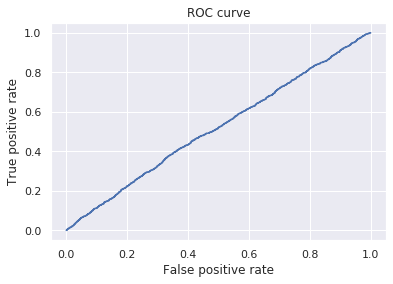

In [60]:
ROC(y_test, y_pred)
print("F1score = ",F1score(y_test,y_pred))

In [61]:
gnb = GaussianNB()
gnb.fit(X_train1, y_train1)
y_pred = gnb.predict(X_test1)

print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.7679446526376478


F1score =  0.7641371227658951


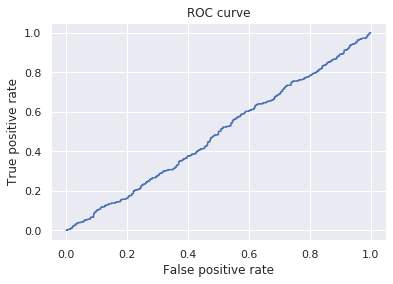

In [62]:
ROC(y_test1, y_pred1)
print("F1score = ",F1score(y_test1,y_pred1))

### KNN

In [63]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(80,), random_state=1)
clf.fit(X_train,y_train)
y_predict1 = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_predict1))

Accuracy: 0.886070826306914


F1score =  0.4249233912155261


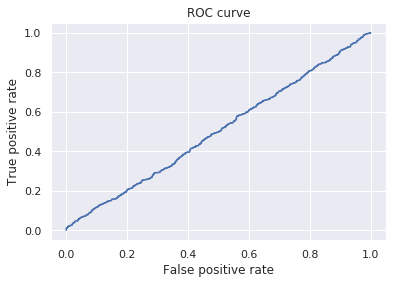

In [64]:
ROC(y_test, y_predict1)
print("F1score = ",F1score(y_test,y_predict1))

### SVM

In [65]:
clf = svm.SVC()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy: 0.8881618887015177


array([[12862,   181],
       [ 1477,   305]])

F1score =  0.26895943562610225


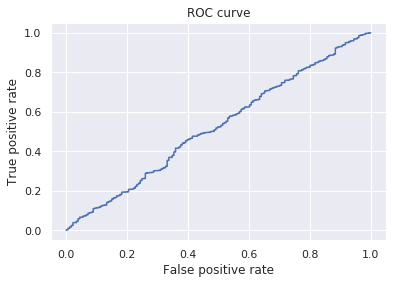

In [66]:
ROC(y_test, y_pred)
print("F1score = ",F1score(y_test,y_pred))

In [67]:
clf = svm.SVC()
clf.fit(X_train1,y_train1)

y_pred = clf.predict(X_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred))
confusion_matrix(y_test1, y_pred)

Accuracy: 0.8008071490343038


array([[1344,  408],
       [ 283, 1434]])

F1score =  0.8058443382972745


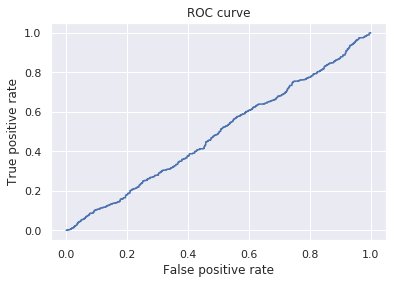

In [68]:
ROC(y_test1, y_pred)
print("F1score = ",F1score(y_test1,y_pred))

LOGISTIC REG

In [69]:
reg = LogisticRegression(penalty='l1')
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.8810118043844857


array([[12669,   374],
       [ 1390,   392]])

F1score =  0.3076923076923077


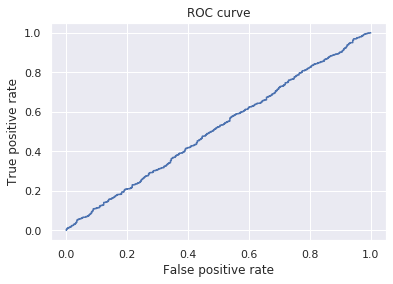

In [70]:
ROC(y_test, y_pred)
print("F1score = ",F1score(y_test,y_pred))

In [71]:
reg = LogisticRegression(penalty='l1')
reg.fit(X_train1,y_train1)
y_pred = reg.predict(X_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred))
confusion_matrix(y_test1, y_pred)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.7780340155664457


array([[1369,  383],
       [ 387, 1330]])

F1score =  0.7755102040816326


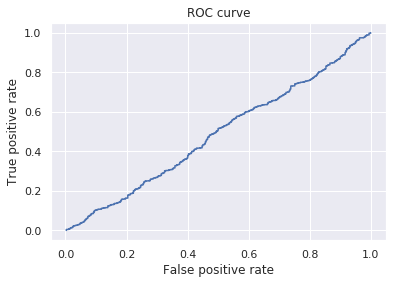

In [72]:
ROC(y_test1, y_pred)
print("F1score = ",F1score(y_test1,y_pred))

FEATURE CONSTRUCTION

In [73]:
# Create new feature: Prev_contact (if the client has been contacted or not before this campaign)
prev_contact = np.array(original_data.pdays)
with np.nditer(prev_contact, op_flags=['readwrite']) as it:
    for x in it:
        if x == -1:
            x[...] = 0
        else:
            x[...] = 1
original_data['prev_contacted'] = prev_contact.tolist()

MODELLING WITH NEW FEATURE

In [74]:
C1= original_data[original_data['y']==1]
C0 = original_data[original_data['y']==0].sample(n=len(C1), random_state=0)
data_balanced = pd.concat([C0, C1])
x1 = data_balanced.iloc[:,:-1]
y1 = data_balanced.iloc[:,-1]

In [75]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.33)
data_balanced.describe()
X_train1 = preprocessing.StandardScaler().fit_transform(X_train1)
X_test1 = preprocessing.StandardScaler().fit_transform(X_test1)

In [76]:
### Kneighboor classifier
neigh = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', p=2)
neigh.fit(X_train1, y_train1)

y_pred1 = neigh.predict(X_test1)

print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

confusion_matrix(y_test1,y_pred1)

Accuracy: 0.9593542807725569


array([[2564,    2],
       [ 139,  764]])

F1score =  0.9155182744158179


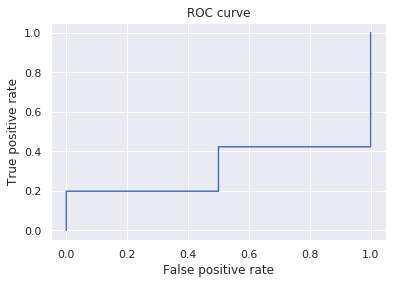

In [77]:
ROC(y_test1, y_pred1)
print("F1score = ",F1score(y_test1,y_pred1))

In [78]:
clf = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_split=20)
clf.fit(X_train1,y_train1)
y_predict1 = clf.predict(X_test1)
print("Accuracy :",metrics.accuracy_score(y_test1, y_predict1))
confusion_matrix(y_test1, y_predict1)

Accuracy : 0.9985586624387431


array([[2566,    0],
       [   5,  898]])

F1score =  0.9972237645752361


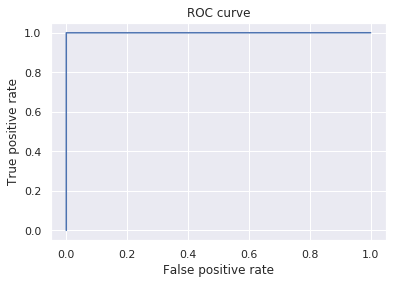

In [79]:
ROC(y_test1, y_predict1)
print("F1score = ",F1score(y_test1,y_predict1))

In [80]:
clf = RandomForestClassifier(max_depth=30, random_state=0)
clf.fit(X_train1,y_train1)
y_predict1=clf.predict(X_test1)
print("Accuracy ",k, " :",metrics.accuracy_score(y_test1, y_predict1))
confusion_matrix(y_test1, y_predict1)

Accuracy  4  : 1.0


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[2566,    0],
       [   0,  903]])

F1score =  1.0


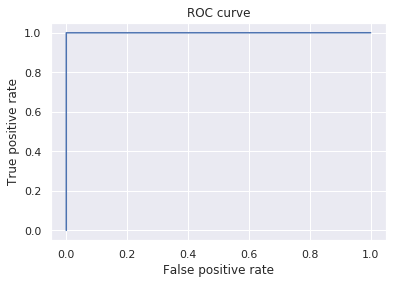

In [81]:
ROC(y_test1, y_predict1)
print("F1score = ",F1score(y_test1,y_predict1))

In [82]:
gnb = GaussianNB()
gnb.fit(X_train1, y_train1)
y_pred = gnb.predict(X_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred))
confusion_matrix(y_test1, y_predict1)

Accuracy: 0.26030556356298645


array([[2566,    0],
       [   0,  903]])

F1score =  0.41308325709057636


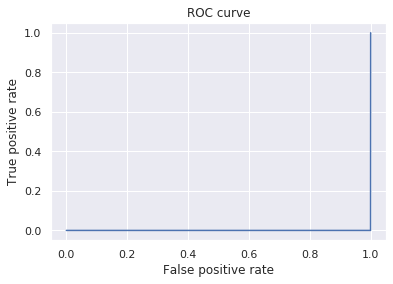

In [83]:
ROC(y_test1, y_pred)
print("F1score = ",F1score(y_test1,y_pred))

In [84]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(80,), random_state=1)
clf.fit(X_train1,y_train1)
y_predict1 = clf.predict(X_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_predict1))

Accuracy: 0.9988469299509946


F1score =  0.9977802441731409


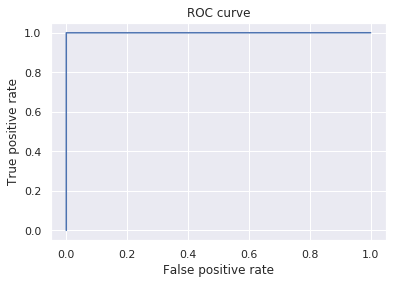

In [85]:
ROC(y_test1, y_predict1)
print("F1score = ",F1score(y_test1,y_predict1))

In [86]:
clf = svm.SVC()
clf.fit(X_train1,y_train1)

y_pred = clf.predict(X_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred))
confusion_matrix(y_test1, y_pred)


Accuracy: 0.9974055923897377


array([[2566,    0],
       [   9,  894]])

F1score =  0.994991652754591


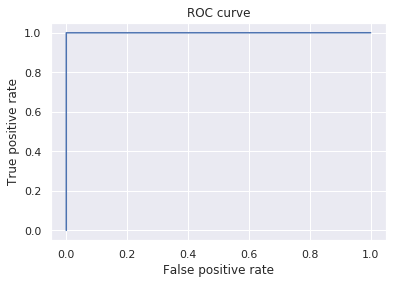

In [87]:
ROC(y_test1,y_pred)
print("F1score = ",F1score(y_test1,y_pred))

In [88]:
reg = LogisticRegression(penalty='l1')
reg.fit(X_train1,y_train1)
y_pred = reg.predict(X_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred))
confusion_matrix(y_test1, y_pred)

Accuracy: 1.0


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[2566,    0],
       [   0,  903]])

F1score =  1.0


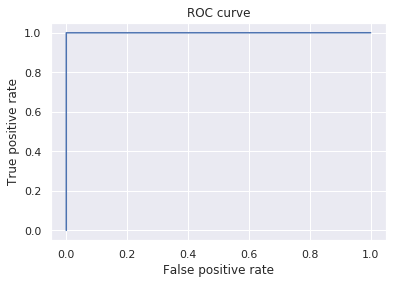

In [89]:
ROC(y_test1,y_pred)
print("F1score = ",F1score(y_test1,y_pred))